## Задача предсказания оттока клиентов телеком компании

данные тут: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download



- **customerID**: Уникальный идентификатор каждого клиента.
- **gender**: Пол клиента (Мужчина, Женщина).
- **SeniorCitizen**: Является ли клиент пожилым гражданином (1 - да, 0 - нет).
- **Partner**: Есть ли у клиента партнер (Да или Нет).
- **Dependents**: Есть ли у клиента иждивенцы (Да или Нет).
- **tenure**: Количество месяцев, в течение которых клиент обслуживается в компании.
- **PhoneService**: Есть ли у клиента телефонная связь (Да или Нет).
- **MultipleLines**: Есть ли у клиента несколько телефонных линий (Да, Нет или Нет телефонной связи).
- **InternetService**: Тип интернет-сервиса клиента (DSL, Оптоволокно или Нет).
- **OnlineSecurity**: Подключена ли услуга онлайн-безопасности (Да, Нет или Нет интернета).
- **OnlineBackup**: Подключена ли услуга онлайн-резервного копирования (Да, Нет или Нет интернета).
- **DeviceProtection**: Подключена ли услуга защиты устройства (Да, Нет или Нет интернета).
- **TechSupport**: Подключена ли услуга технической поддержки (Да, Нет или Нет интернета).
- **StreamingTV**: Подключена ли услуга потокового телевидения (Да, Нет или Нет интернета).
- **StreamingMovies**: Подключена ли услуга потокового видео (Да, Нет или Нет интернета).
- **Contract**: Тип контракта с клиентом (Помесячный, На год, На два года).
- **PaperlessBilling**: Использует ли клиент электронные счета (Да или Нет).
- **PaymentMethod**: Способ оплаты (Электронный чек, Почтовый чек, Банковский перевод, Кредитная карта).
- **MonthlyCharges**: Ежемесячная плата клиента.
- **TotalCharges**: Общая сумма, начисленная клиенту.
- **Churn**: Покинул ли клиент компанию (Да или Нет).


задача бинарной классификации

$$g(x_i) \approx y_i$$

$x_i$ - вектор признаков по клиенту i

$y_i \in \{ 0, 1 \}$ 

0 - No Churn
1 - Churn

- `!wget` - команда Linux для загрузки данных
- `pd.read_csv()` - чтение csv файлов
- `df.head()` - просмотр первых строк датафрейма
- `df.head().T` - просмотр транспонированного датафрейма
- `df.columns` - получение названий столбцов датафрейма
- `df.columns.str.lower()` - приведение всех букв к нижнему регистру
- `df.columns.str.replace(' ', '_')` - замена пробелов на подчеркивание
- `df.dtypes` - получение типов данных всех столбцов
- `df.index` - получение индексов датафрейма
- `pd.to_numeric()` - преобразование значений столбца в числовой формат. Аргумент `errors='coerce'` позволяет выполнить преобразование, несмотря на ошибки.
- `df.fillna()` - замена NA значений на определённое значение
- `(df.x == "yes").astype(int)` - преобразование столбца x с yes-no значениями в числовой формат.


In [63]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
 
# data = "https://..."
# !wget $data -O data-week-3.csv

In [64]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [66]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


## Подготовка данных

In [67]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [68]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [69]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [70]:
df.churn = (df.churn == 'yes').astype(int)

In [71]:
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,0
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,0
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,1


## Exploratory data analysis

Анализ данных (Exploratory data analysis, EDA) для этого проекта включал:

- Проверку пропущенных значений
- Изучение распределения целевой переменной (отток)
- Рассмотрение числовых и категориальных переменных

Полезные функции:

- `df.isnull().sum()` - возвращает количество пропущенных значений в датафрейме.
- `df.x.value_counts()` - возвращает количество значений для каждой категории в столбце `x`. Аргумент `normalize=True` позволяет получить процент для каждой категории. В этом проекте среднее значение оттока равно уровню оттока, полученному с помощью метода `value_counts`.
- `round(x, y)` - округляет число `x` до `y` знаков после запятой.
- `df[x].nunique()` - возвращает количество уникальных значений в столбце `x`.


In [74]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [76]:
df.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

Среди них 1869 — недовольные клиенты (отток), а остальные 5174 — довольные клиенты (не отток). Понимание распределения целевой переменной — важный шаг в любой задаче анализа данных или моделирования, поскольку оно дает ценную информацию о балансе классов данных, которая может повлиять на решения по моделированию и метрики оценки.



In [77]:
df.churn.value_counts(normalize=True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

In [78]:
global_churn_rate = df.churn.mean()
round(global_churn_rate, 2)

0.27

In [79]:
numerical_vars = df.select_dtypes(include=['int64', 'float64'])
categorical_vars = df.select_dtypes(include=['object'])
 
print("Numerical Variables:")
print(numerical_vars.columns)
 
print("\nCategorical Variables:")
print(categorical_vars.columns)

Numerical Variables:
Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges', 'churn'], dtype='object')

Categorical Variables:
Index(['customerid', 'gender', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object')


In [81]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
 
# Удалим 'customerid', 'tenure', 'monthlycharges', 'totalcharges', 'churn'
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [82]:
df[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance

In [84]:
female_mean = df[df.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df[df.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.269
gender == male:   0.262


In [85]:
partner_yes = df[df.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df[df.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.197
partner == no : 0.33


- нет большого влияния пола на отток клиента
- наличие партнера оказывает большее влияние на отток клиента, наличие партнера уменьшает вероятность ухода клиента

### Risk ratio

В контексте машинного обучения и классификации «коэффициент риска» обычно относится к статистической мере, используемой для оценки вероятности или вероятности определенного события, происходящего в одной группе по сравнению с другой. 


- Определение коэффициента риска: коэффициент риска (относительный риск) определяется как вероятность события, происходящего в одной группе, деленная на вероятность того же события, происходящего в другой группе. В случае коэффициента оттока вы обычно сравниваете две группы: одну группу, которая демонстрирует определенную характеристику или поведение (например, клиент ушел), и другую группу, которая не демонстрирует эту характеристику (например, клиент не ушел).
- Интерпретация: Коэффициент риска больше 1 предполагает, что событие (в данном случае отток) более вероятно в первой группе по сравнению со второй группой. Коэффициент риска меньше 1 предполагает, что событие менее вероятно в первой группе. Коэффициент риска, равный 1, означает, что нет никакой разницы в риске между двумя группами.
- Применение: Мы можем использовать коэффициенты риска для оценки влияния различных функций или вмешательств на отток. Например, мы можем рассчитать коэффициент риска оттока для клиентов, которые получили рекламное предложение, по сравнению с теми, кто его не получил. Если коэффициент риска значительно больше 1, это означает, что рекламное предложение оказало положительное влияние на снижение оттока.
- Статистическая значимость: важно также учитывать статистическую значимость при интерпретации коэффициентов риска. Статистические тесты, такие как тесты хи-квадрат или доверительные интервалы, могут помочь определить, являются ли наблюдаемые различия в показателях оттока статистически значимыми.

In [86]:
print(partner_yes / global_churn_rate)

 
print(partner_no / global_churn_rate)

0.7410375164075894
1.241963847619165


### 1. Diff

**global - group**

- Если результат **< 0**:  
  _Более вероятен отток_
  
- Если результат **> 0**:  
  _Менее вероятен отток_

### 2. Risk ratio

**Формула:**


$\text{Risk} = \frac{\text{group}}{\text{global}}$


- Если результат **> 1**:  
  _Более вероятен отток_
  
- Если результат **< 1**:  
  _Менее вероятен отток_




```sql
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    date
GROUP BY
    gender;

Мы можем выполнить этот анализ для всех переменных, а не только для переменной пола.

In [18]:
df_group = df.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,diff,risk
gender,,,
female,0.269209,0.003839,1.014466
male,0.261603,-0.003766,0.985807


In [87]:
from IPython.display import display

for col in categorical:
    df_group = df.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

,mean,diff,risk
gender,,,
female,0.269209,0.003839,1.014466
male,0.261603,-0.003766,0.985807


,mean,diff,risk
seniorcitizen,,,
0,0.236062,-0.029308,0.889557
1,0.416813,0.151443,1.570686


,mean,diff,risk
partner,,,
no,0.329580,0.064210,1.241964
yes,0.196649,-0.068721,0.741038


,mean,diff,risk
dependents,,,
no,0.312791,0.047422,1.178700
yes,0.154502,-0.110868,0.582215


,mean,diff,risk
phoneservice,,,
no,0.249267,-0.016103,0.939319
yes,0.267096,0.001726,1.006506


,mean,diff,risk
multiplelines,,,
no,0.250442,-0.014927,0.943749
no_phone_service,0.249267,-0.016103,0.939319
yes,0.286099,0.020729,1.078114


,mean,diff,risk
internetservice,,,
dsl,0.189591,-0.075779,0.714441
fiber_optic,0.418928,0.153558,1.578656
no,0.074050,-0.191320,0.279044


,mean,diff,risk
onlinesecurity,,,
no,0.417667,0.152297,1.573906
no_internet_service,0.074050,-0.191320,0.279044
yes,0.146112,-0.119258,0.550597


,mean,diff,risk
onlinebackup,,,
no,0.399288,0.133918,1.504645
no_internet_service,0.074050,-0.191320,0.279044
yes,0.215315,-0.050055,0.811377


,mean,diff,risk
deviceprotection,,,
no,0.391276,0.125906,1.474456
no_internet_service,0.074050,-0.191320,0.279044
yes,0.225021,-0.040349,0.847951


,mean,diff,risk
techsupport,,,
no,0.416355,0.150985,1.568960
no_internet_service,0.074050,-0.191320,0.279044
yes,0.151663,-0.113706,0.571517


,mean,diff,risk
streamingtv,,,
no,0.335231,0.069861,1.263261
no_internet_service,0.074050,-0.191320,0.279044
yes,0.300702,0.035332,1.133143


,mean,diff,risk
streamingmovies,,,
no,0.336804,0.071434,1.269188
no_internet_service,0.074050,-0.191320,0.279044
yes,0.299414,0.034044,1.128291


,mean,diff,risk
contract,,,
month-to-month,0.427097,0.161727,1.609440
one_year,0.112695,-0.152675,0.424672
two_year,0.028319,-0.237051,0.106714


,mean,diff,risk
paperlessbilling,,,
no,0.163301,-0.102069,0.615371
yes,0.335651,0.070281,1.264842


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.167098,-0.098271,0.629681
credit_card_(automatic),0.152431,-0.112939,0.574410
electronic_check,0.452854,0.187484,1.706502
mailed_check,0.191067,-0.074303,0.720003


### Feature importance: Mutual information

[Взаимная информация (Mutual information)](https://ru.wikipedia.org/wiki/%D0%92%D0%B7%D0%B0%D0%B8%D0%BC%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D1%8F), концепция из теории информации, решает эту проблему, количественно определяя, сколько мы можем узнать об одной переменной, когда знаем значение другой. Чем выше взаимная информация, тем больше информации мы получаем об оттоке, наблюдая значение другой переменной. По сути, она предоставляет средства для измерения важности категориальных переменных и их значений в прогнозировании оттока, позволяя нам сравнивать их значимость относительно друг друга.

In [91]:
from sklearn.metrics import mutual_info_score
 
mutual_info_score(df.churn, df.contract)

 
mutual_info_score(df.churn, df.gender)

 
mutual_info_score(df.churn, df.partner)

0.011453657253317984

In [92]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df.churn)
 
mi = df[categorical].apply(mutual_info_churn_score)
mi

gender              0.000037
seniorcitizen       0.010577
partner             0.011454
dependents          0.014467
phoneservice        0.000072
multiplelines       0.000801
internetservice     0.055574
onlinesecurity      0.064677
onlinebackup        0.046792
deviceprotection    0.043917
techsupport         0.063021
streamingtv         0.031908
streamingmovies     0.032001
contract            0.098453
paperlessbilling    0.019194
paymentmethod       0.044519
dtype: float64

In [22]:
mi.sort_values(ascending=False)

contract            0.098453
onlinesecurity      0.064677
techsupport         0.063021
internetservice     0.055574
onlinebackup        0.046792
paymentmethod       0.044519
deviceprotection    0.043917
streamingmovies     0.032001
streamingtv         0.031908
paperlessbilling    0.019194
dependents          0.014467
partner             0.011454
seniorcitizen       0.010577
multiplelines       0.000801
phoneservice        0.000072
gender              0.000037
dtype: float64

### Feature importance: Correlation

Коэффициент корреляции Пирсона количественно определяет степень линейной зависимости между двумя числовыми переменными.

Коэффициент корреляции (часто обозначаемый как «r») имеет диапазон от -1 до 1:

Отрицательная корреляция (r = -1) указывает на сильную обратную связь, при которой одна переменная увеличивается, а другая уменьшается.
Положительная корреляция (r = 1) указывает на сильную положительную связь, при которой обе переменные увеличиваются одновременно.
Значение r, близкое к 0, указывает на слабую или отсутствующую линейную связь между переменными.
Сила корреляции определяется абсолютным значением r:

- 0,0 < |r| < 0,2: Низкая корреляция
- 0,2 < |r| < 0,5: Умеренная корреляция
- 0,6 < |r| < 1,0: Сильная корреляция

In [23]:
# correlation = df[numerical_vars].corr()['churn']

In [24]:
df[numerical]

,tenure,monthlycharges,totalcharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [93]:
	
df[numerical].corrwith(df.churn)

tenure           -0.352229
monthlycharges    0.193356
totalcharges     -0.198324
dtype: float64

## One-hot encoding

One-Hot Encoding позволяет кодировать категориальные переменные в числовые. Этот метод представляет каждую категорию переменной в виде отдельного столбца, где значению присваивается 1, если оно относится к категории, или 0 в противном случае.


- `df[x].to_dict(orient='records')` - преобразует серию `x` в словари, ориентированные по строкам.
- `DictVectorizer().fit_transform(x)` - класс Scikit-Learn для преобразования словарей `x` в разреженную матрицу, таким образом выполняя one-hot кодирование. Этот метод не влияет на числовые переменные.
- `DictVectorizer().get_feature_names()` - возвращает имена столбцов в разреженной матрице.


In [94]:
from sklearn.feature_extraction import DictVectorizer

In [95]:
df_dict = df[categorical + numerical].to_dict(orient='records')

In [96]:
df_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'no',
 'multiplelines': 'no_phone_service',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 1,
 'monthlycharges': 29.85,
 'totalcharges': 29.85}

In [97]:
dv = DictVectorizer(sparse=False)
dv.fit(df_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [98]:
X = dv.transform(df_dict)

При использовании transform метода, показанного в последнем фрагменте, по умолчанию создается разреженная матрица. 

In [99]:
X.shape

(7043, 45)

In [100]:
X

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.9850e+01],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.4000e+01,
        1.8895e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 2.0000e+00,
        1.0815e+02],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.1000e+01,
        3.4645e+02],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 4.0000e+00,
        3.0660e+02],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 6.6000e+01,
        6.8445e+03]])

In [35]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## Разделение выборки (train/test/val)

In [101]:
from sklearn.model_selection import train_test_split

y = df.churn.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Построение модели логистической регрессии (train logistic regression)

Логистическая регрессия похожа на линейную регрессию, поскольку обе модели учитывают смещение и взвешенную сумму признаков. Разница между этими моделями заключается в том, что выходные данные линейной регрессии представляют собой действительное число, тогда как логистическая регрессия выдает значение от нуля до единицы, применяя сигмовидную функцию к формуле линейной регрессии.





**Линейная регрессия**:  
$ g(x_i) = w_0 + w^T x_i $ → результат - число от $ -\infty $ до $ \infty \in \mathbb{R} $

- $ x_0 $ — свободный член (bias term)
- $ w^T $ — вектор весов
- $ x_i $ — признаки

**Логистическая регрессия**:  
$ g(x_i) = \text{SIGMOID}(w_0 + w^T x_i) $ → результат - число от 0 до 1 $ \in \mathbb{R} $

Функция сигмоида:  
$ \text{sigmoid}(z) = \frac{1}{1 + \exp(-z)} =\frac{1}{1 + \exp(- (w_0 + w^T x_i))}$


Эта функция отображает любое действительное число z в диапазон от 0 до 1, что делает его пригодным для моделирования вероятностей в логистической регрессии. Мы будем использовать эту функцию для преобразования оценки в вероятность.

In [102]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
 
z = np.linspace(-7, 7, 51)

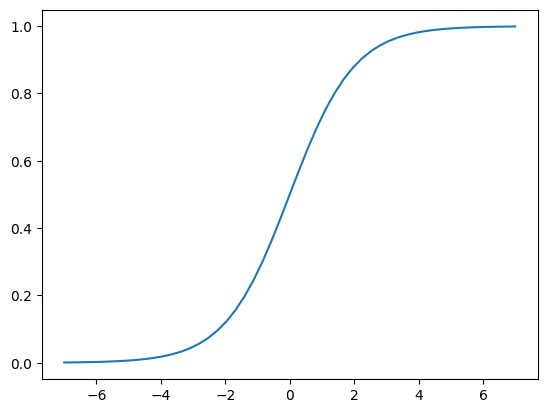

In [103]:

plt.plot(z, sigmoid(z))

Линейная регрессия и логистическая регрессия называются линейными моделями , потому что скалярное произведение в линейной алгебре является линейным оператором. Линейные модели быстры в использовании и обучении.

In [40]:
from sklearn.linear_model import LogisticRegression

In [104]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [105]:
model.predict_proba(X_test)

array([[0.94351771, 0.05648229],
       [0.86103991, 0.13896009],
       [0.67446829, 0.32553171],
       ...,
       [0.37268456, 0.62731544],
       [0.97284481, 0.02715519],
       [0.97097012, 0.02902988]])

In [106]:
y_pred = model.predict_proba(X_test)[:, 1]

In [107]:
y_pred

array([0.05648229, 0.13896009, 0.32553171, ..., 0.62731544, 0.02715519,
       0.02902988])

In [108]:
churn = y_pred > 0.5

In [109]:
(y_test == churn).mean()

0.8088026502602934

## Интерпретация модели (Model interpretation)

In [110]:
model.intercept_[0]

-0.12883773950754807

In [112]:
# dict(zip((), model.coef_[0].round(3)))

In [113]:
subset = ['contract', 'tenure', 'totalcharges']
dict_small = df[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dict_small)

X_small = dv_small.transform(dict_small)


In [114]:
X_train_small, X_test_small, y_train, y_test = train_test_split(X_small, y, test_size=0.3, random_state=1)

In [115]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [117]:
X_train_small

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+01, 1.41620e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 6.90000e+01, 7.44690e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 1.20000e+01, 9.50200e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 1.60000e+01, 1.11485e+03]])

In [116]:
model_small.coef_

array([[ 0.59408749, -0.30587271, -0.69542264, -0.09383807,  0.00078395]])

In [52]:
model_small.intercept_[0]

-0.4072078586615085

In [55]:
y_pred_small = model_small.predict_proba(X_test_small)[:, 1]

In [56]:
sigmoid(-0.4 + (1*0.594 + 0*-0.306 + 0*(-0.695) + 50* (-0.094) +5*0.001))

0.010976081712906592

## Using the model

In [118]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [119]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.05648228940753353

In [120]:
print(list(X_test[0]))

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 79.85, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 41.0, 3320.75]


In [61]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [62]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8234405539406862